### A thin first-year (FY) thermodynamic ice model

From **On Sea Ice** by Willy Weeks (EBOOK ISBN 9781602231016) and **Energy exchange over young sea ice in the central Arctic** by Maykut (1978, doi:10.1029/JC083iC07p03646).



### Energy balance at ice surface
***

- For thin ice growing in winter
- Neglecting ice melt
- Neglecting ocean heat flux since time scales are longer than those consider for rapid thin ice growth
- Positive flux is downward toward the ice surface.

$$(1 - \alpha)(1-i_0) F_r + F_{IL} + F_{OL} + F_{s} + F_{c} + F_{e} = 0$$


$\alpha$ (``alpha``): ice albedo

- $i_0 \approx 0.55$ for bare ice
- $i_0 \approx 0.85$ for snow on ice

$i_0$ (``i0``): fraction of indicent shortwave radiative energy transmitted into the ice interior (away from surface)

- $i_0 \approx 0.3$

$F_r$ (``Fr``): incoming shortwave radation


- small except in summer
- For clear skies: depends on solar constant $S_0$, partial pressure of water vapor $e_a$, and solar zenith angle, Z, depends on location and time of year: https://www.ncei.noaa.gov/sites/default/files/2021-08/Angle_Calculations.pdf.
- decreases with cloud cover
- $F_r \approx 300 W m^{-2}$ (Key & Stone, 1997)

$F_{IL}$ (``FIL``): incoming longwave radation
- annual values are usually twice as large as incoming $F_r$

$$F_{IL} = \epsilon_{a} \sigma T_{a}^{4} $$

- $\sigma$ (``sigma``): Stefan-Boltzmann constant ($\sigma = 5.67 \times 10^{-8} W m^{-2} K^{-4}$)
- $\epsilon_{a}$ (``eps_a``): atmospheric emissivity (assume $\epsilon_{a} = 0.8$)

$F_{OL}$ (``FOL``): outgoing longwave radation (negative because flux directed away from surface)

$$F_{OL} = - \epsilon_{i} \sigma T_{i}^{4} $$

- $T_{i} = T_{o}$ for bare ice, or the snow surface temperature if including snow
- $\epsilon_{i}$ (``eps_i``): ice emissivity (assume the ice is a perfect blackbody radiator, $\epsilon_{i} = 1$)


$F_s$ (``Fs``): sensible heat flux

$F_e$ (``Fe``): latent heat flux

$F_c$ (``Fc``): conductive heat flux (positive down here)


### Conductive heat flux within the ice
***


$H$ (``H``): ice bottom depth **(negative below water surface @ z = 0)?**

$k_i$ (``ki``): ice thermal conductivity 
- $\mathrm{2.2 \; W \; m^{-1} \; K^{-1}}$

$k_s$ (``ks``): snow thermal conductivity 
- $\mathrm{0.31 \; W \; m^{-1} \; K^{-1}}$

$\rho_i$ (``rhoi``): ice density

$T_o$ (``To``): ice surface temperature, assumed to always be below the freezing point ($\mathrm{- 1.8 ^{\circ} C}$)

$T_f$ (``Tf``): ice bottom / seawater temperature (fixed at the freezing point $\mathrm{T_f = - 1.8 ^{\circ} C}$ during ice growth)

$F_c$ (``Fc``): conductive heat flux **(positive up)?**, depends on $H$, $T_o$, and $T_f$

*assume a linear temperature gradient within the ice*
$$F_c(H) = k_i \frac{T_o - T_f}{H}$$



$F_w$ (``Fw``): ocean heat flux (positive up)

$L$ (``L``): latent heating of melting / freezing

***


The ice at the bottom face will melt if $F_w + F_c > 0$

The ice at the bottom face will freeze if $F_w + F_c < 0$


***

Key, J., Liu, Y., & Stone, R. (1997). Development and evaluation of surface shortwave flux parameterizations for use in sea-ice models. Annals of Glaciology, 25, 33-37. doi:10.3189/S0260305500013756. https://doi.org/10.3189/S0260305500013756

Maykut, G. A. (1978), Energy exchange over young sea ice in the central Arctic, J. Geophys. Res., 83( C7), 3646– 3658, doi:10.1029/JC083iC07p03646. https://doi.org/10.1029/JC083iC07p03646



In [1]:
import numpy as np

from metpy.units import units
from metpy.calc import mixing_ratio_from_relative_humidity
from metpy.calc import vapor_pressure

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

### Calculate conductive heat flux $F_c$ through the ice

ice bottom depth
   -1.5 meter

temperature
   top: 243.34999999999997 kelvin
   bottom: 271.34999999999997 kelvin

ice thermal conductivity
   2.2 watt / kelvin / meter

--->
--->
conductive heat flux
   ice only: 41.06666666666667 watt / meter ** 2
   (flux is upward)
   with snow: 27.877372262773722 watt / meter ** 2
   (flux is upward)


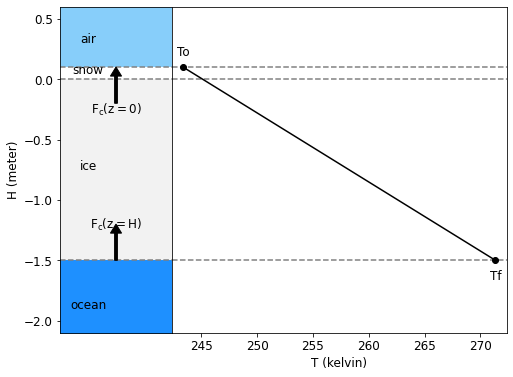

In [9]:
#===============================================
# air and ice (or snow) surface temperatures
Ta = (-30.4 * units('degC')).to('K')
To = (-29.8 * units('degC')).to('K')

H  = -1.5 * units('meter') # ice depth from sea level
hs = 0.1 * units('meter') # snow thickness

Tf = (-1.8 * units('degC')).to(units('K'))

ki = 2.2 * units('W')/units('meter')/units('K') # ice conductivity
ks = 0.31 * units('W')/units('meter')/units('K') # snow conductivity
#===============================================
print(f'ice bottom depth\n   {H}\n')
print(f'temperature\n   top: {To}\n   bottom: {Tf}\n')
print(f'ice thermal conductivity\n   {ki}\n')

# calculate conductive heat flux through ice only
Fc = ki * (Tf - To) / (-H)

# Fc in ice-snow system
Fc_snow = ((ki*ks)/(ki*hs + ks*(-H))) * (Tf - To)


# determine direction of conductive heat flux
flux_direction = "upward"*((Fc.magnitude)>0) + "downward"*((Fc.magnitude)<0)
if (Fc.magnitude) == 0:
    flux_direction = 'zero'
print(f'--->\n--->\nconductive heat flux\n   ice only: {Fc}\n   (flux is {flux_direction})')
print(f'   with snow: {Fc_snow}\n   (flux is {flux_direction})')

# PLOT
#-----
fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [1,3]}, figsize=(8,6))
fig.subplots_adjust(wspace=0)
lyr_fr = 0.4 # fraction of ice layer to show other material layers

# set plot limits and labels for both
for ax in (axs[0], axs[1]):
    ax.set_ylim(H.magnitude*(1+lyr_fr), -lyr_fr*H.magnitude)
axs[0].set_xlim(-1, 1)
axs[0].set_xticks([])
xmin = np.min([To.magnitude, Tf.magnitude])-1
xmax = np.max([To.magnitude, Tf.magnitude])+1
axs[1].set_xlim(xmin, xmax)  
axs[1].set_yticks([])
axs[0].set_ylabel(f'H ({H.units})')
axs[1].set_xlabel(f'T ({Tf.units})')

# add material lines to both plots
axs[0].hlines(hs.magnitude, -1, 1, colors = 'gray', linestyle='dashed', zorder=1)
axs[0].hlines(0, -1, 1, colors = 'gray', linestyle='dashed', zorder=1)
axs[0].hlines(H.magnitude, -1, 1, colors = 'gray', linestyle='dashed', zorder=1)
axs[1].hlines(hs.magnitude, xmin, xmax, colors = 'gray', linestyle='dashed', zorder=1)
axs[1].hlines(0, xmin, xmax, colors = 'gray', linestyle='dashed', zorder=1)
axs[1].hlines(H.magnitude, xmin, xmax, colors = 'gray', linestyle='dashed', zorder=1)

# label materials in left plot
axs[0].text(-0.5, hs.magnitude+lyr_fr/2, 'air', horizontalalignment='center')
axs[0].fill_between([-1,1], [-lyr_fr*H.magnitude], y2=[hs.magnitude], color='lightskyblue', zorder=0)
if hs.magnitude != 0:
    axs[0].text(-0.5, hs.magnitude/2, 'snow', horizontalalignment='center')
    axs[0].fill_between([-1,1], [hs.magnitude], y2=[0], color='white', zorder=0)
axs[0].text(-0.5, H.magnitude/2, 'ice', horizontalalignment='center')
axs[0].fill_between([-1,1], [H.magnitude], y2=[0], color=[0.95,0.95,0.95], zorder=0)
axs[0].text(-0.5, H.magnitude-lyr_fr, 'ocean', horizontalalignment='center')
axs[0].fill_between([-1,1], [H.magnitude*(1+lyr_fr)], y2=[H.magnitude], color='dodgerblue', zorder=0)

arr_lng = 0.2 # arrow length
if str(flux_direction) == 'upward':
    y0_b = H.magnitude
    dy = arr_lng + hs.magnitude
    y0_t = -arr_lng
else:
    y0_b = H.magnitude+arr_lng
    dy = -arr_lng
    y0_t = 0+ hs.magnitude
    
# ocean interface conductive flux arrow
axs[0].arrow(0, y0_b, 0, dy, length_includes_head = True, facecolor='k',  width=0.05, head_width=0.2, head_length = 0.075, zorder = 2)
axs[0].text(0, (H.magnitude+arr_lng)*0.95, '$\mathrm{F_c(z=H)}$',  horizontalalignment='center')
# air interface conductive flux arrow
axs[0].arrow(0, y0_t, 0, dy, length_includes_head = True, facecolor='k',  width=0.05, head_width=0.2, head_length = 0.075, zorder = 2)
axs[0].text(0, -(arr_lng)*1.4, '$\mathrm{F_c(z=0)}$',  horizontalalignment='center')

# axs[0].annotate("", xy=(0.5, 0.5), xytext=(0, 0),
#             arrowprops=dict(arrowstyle="->"))
       
# plot temperature distribution
axs[1].plot(np.linspace(Tf.magnitude, To.magnitude,20),  np.linspace(H.magnitude,hs.magnitude,20), c='k')
axs[1].scatter([Tf.magnitude, To.magnitude], [H.magnitude, hs.magnitude], c='k', zorder=2)
axs[1].text(To.magnitude, hs.magnitude-H.magnitude*0.05, f'To', horizontalalignment='center', verticalalignment = 'bottom');
axs[1].text(Tf.magnitude, H.magnitude*1.05, f'Tf', horizontalalignment='center', verticalalignment = 'top');


### Energy balance at ice surface

In [10]:

#===============================================
# constants, material properties, or things we can't constrain so use a constant
sigma = 5.67*10**(-8)*units('watt')/units('meter')**2/units('kelvin')**4 # SB constant
alpha = 0.55 # surface albedo
i0 = 0.3     # fraction of SWR absorbed at sfc
eps_i = 1    # ice emissivity
p = 1013 * units.hPa # surface pressure
f = 1 # near surface relative humidity, from central Arctic observations discussed in Weeks

# near surface vapor pressure of water in millibars
e = vapor_pressure(p, mixing_ratio_from_relative_humidity(p, Ta, f).to('g/kg')).to('millibar')

# parameterization of eps_a from Efimova (1961)
eps_a = 0.746 + 0.0066 * e.magnitude

# cloud fraction
C = 0.1

# shortwave, sensible, latent heat fluxes estimated from Maykut (1978)
Fr = 0*units('watt')/units('meter')**2 # 300 (summer)
Fs = 16.8*units('watt')/units('meter')**2
Fe = 0*units('watt')/units('meter')**2


if hs.magnitude != 0:
    Fc_ = Fc_snow
else:
    Fc_ = Fc
#===============================================

# incoming and outgoing LWR
FIL = eps_a * sigma * Ta**(4) * (1 + 0.26*C)
FOL = - eps_i * sigma * To**(4)

# amount of shortwave actually absorbed into ice surface
ASR = (1-alpha) * (1-i0) * Fr

# calculate net heating
net = ASR + FIL + FOL + Fs + Fc_ + Fe

print(f'net radiation: {net}')

# plot heat flux balance
terms = [ASR, FIL, FOL, Fs, Fc_, Fe, net]
labels = ['ASR', '$F_{IL}$', '$F_{OL}$', '$F_s$', '$F_c$', '$F_e$', 'net']
xx = [ii for ii in range(len(labels))]
colors = ['indianred' if np.sign(term.magnitude) > 0 else 'dodgerblue' for term in terms]
edgecolors = ['None']*len(labels)
edgecolors[-1] = 'k'

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.bar(xx, terms, color = colors, edgecolor = edgecolors, lw = 2)
plt.title('heat balance at ice surface');
ymin = -250
ymax = 250
ax.set_ylim(ymin,ymax)
ax.set_xlim(-1,xx[-1]+1)
ax.set_xticks(xx)
ax.set_xticklabels(labels)

ax.fill_between([xx[0]-1, xx[-1]+1], 0*terms[0].units, y2=ymax*terms[0].units, color='lightskyblue', zorder=0)
ax.fill_between([xx[0]-1, xx[-1]+1], ymin*terms[0].units, y2=0*terms[0].units, color=[0.95,0.95,0.95], zorder=0)

ax.text(xx[-1]+0.5, 0.9*ymax, f'cloud fraction C = {C}', c='gray', horizontalalignment = 'right')

net radiation: -2.812058382489745 watt / meter ** 2


Text(6.5, 225.0, 'cloud fraction C = 0.1')